In [6]:
!pip install python-constraint

Valid Solutions:
Combination 1:
  Python Programmer 1: Ciara
  Database Admin: Jane
  Python Programmer 2: Jane
  Systems Engineer: Jim
  Web Designer: Anita
  AI Engineer 1: Anita
  AI Engineer 2: Jim


Combination 2:
  Python Programmer 1: Ciara
  Database Admin: Jane
  Python Programmer 2: Jane
  Systems Engineer: Jim
  Web Designer: Anita
  AI Engineer 1: Jim
  AI Engineer 2: Anita


Combination 3:
  Python Programmer 1: Ciara
  Database Admin: Jane
  Python Programmer 2: Jane
  Systems Engineer: Jim
  Web Designer: Juan
  AI Engineer 1: Jim
  AI Engineer 2: Juan


Combination 4:
  Python Programmer 1: Ciara
  Database Admin: Jane
  Python Programmer 2: Jane
  Systems Engineer: Jim
  Web Designer: Juan
  AI Engineer 1: Juan
  AI Engineer 2: Jim




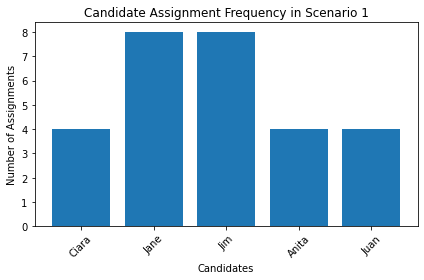

In [24]:
## Scenario 1

from constraint import Problem

def find_hiring_combinations():
    problem = Problem()

    # Define the candidates and their possible roles based on their abilities
    candidates = {
        "Peter": ["Python Programmer", "AI Engineer"],
        "Juan": ["Web Designer", "AI Engineer"],
        "Jim": ["AI Engineer", "Systems Engineer"],
        "Jane": ["Python Programmer", "Database Admin"],
        "Mary": ["Web Designer", "Systems Engineer"],
        "Bruce": ["Systems Engineer", "Python Programmer"],
        "Anita": ["Web Designer", "AI Engineer"]
    }

    # List of roles that need to be filled, including a second role for Python Programmer
    roles = ["Python Programmer 2", "AI Engineer 1", "AI Engineer 2", "Web Designer", "Database Admin", "Systems Engineer"]

    # Assign candidates to roles based on their listed abilities
    for role in roles:
        # Adjust role names to match the abilities of candidates
        adjusted_role = role if "Python Programmer" not in role else "Python Programmer"
        adjusted_role = adjusted_role if "AI Engineer" not in role else "AI Engineer"
        problem.addVariable(role, [name for name, skills in candidates.items() if adjusted_role in skills])

    # Constraint: Ensure that each candidate is assigned to a maximum of two roles
    # This includes a specific check for the AI Engineer roles to be filled by different individuals
    def role_constraint(pp2, ae1, ae2, wd, da, se):
        all_candidates = ["Ciara", pp2, ae1, ae2, wd, da, se]  # Ciara is pre-assigned as one of the Python Programmers
        # Ensure AI Engineer roles are taken by different individuals
        if len(set([ae1, ae2])) < 2:  
            return False
        # Ensure no candidate is assigned more than two roles
        return all(all_candidates.count(candidate) <= 2 for candidate in set(all_candidates))

    problem.addConstraint(role_constraint, roles)

    # Additional constraint: Ensure the total team size is four (including Ciara)
    def hiring_constraint(pp2, ae1, ae2, wd, da, se):
        return len(set(["Ciara", pp2, ae1, ae2, wd, da, se])) == 4

    problem.addConstraint(hiring_constraint, roles)

    # Find solutions that satisfy all constraints
    return problem.getSolutions()

# Execute the function to find valid hiring combinations
hiring_combinations = find_hiring_combinations()

# Display the valid combinations
print("Valid Solutions:")
for i, solution in enumerate(hiring_combinations, start=1):
    print(f"Combination {i}:")
    # Indicating that Ciara is always one of the Python Programmers
    print("  Python Programmer 1: Ciara")
    # Display the roles and the candidates assigned to them
    for role, candidate in solution.items():
        # Adjust the role name for the second Python Programmer for clarity
        role_name = "Python Programmer 2" if role == "Python Programmer 2" else role
        print(f"  {role_name}: {candidate}")
    print("\n")


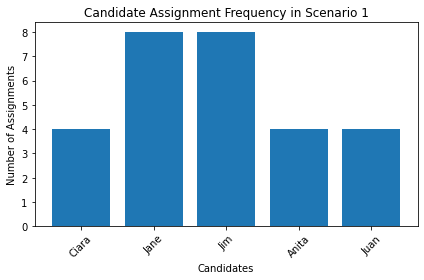

In [26]:
## Visual 1

import matplotlib.pyplot as plt
from collections import Counter

# Function to visualize hiring combinations
def visualize_hiring_combinations(hiring_combinations):
    candidate_counts = Counter()
    for solution in hiring_combinations:
        # Adding Ciara as she is pre-assigned as one of the Python Programmers
        candidate_counts["Ciara"] += 1
        for role, candidate in solution.items():
            candidate_counts[candidate] += 1

    plt.bar(candidate_counts.keys(), candidate_counts.values())
    plt.xlabel('Candidates')
    plt.ylabel('Number of Assignments')
    plt.title('Candidate Assignment Frequency in Scenario 1')
    plt.xticks(rotation=45)
    plt.tight_layout()  # Adjusts the plot to ensure everything fits without overlapping
    plt.show()

# Call the visualization function with the hiring_combinations
visualize_hiring_combinations(hiring_combinations)


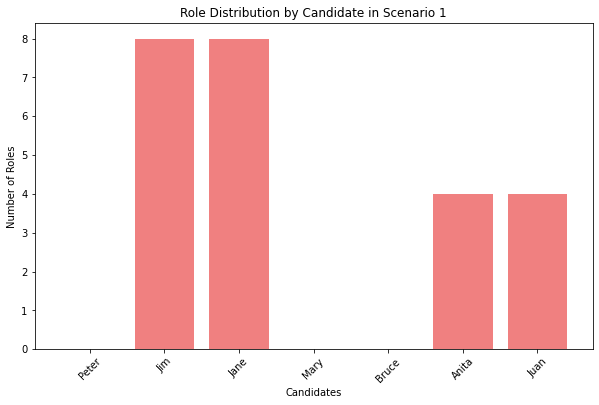

In [28]:
## Visual 2

# Role Distribution by Candidate for Scenario 1
role_counts_scenario_1 = {candidate: 0 for candidate in candidates.keys()}
for solution in hiring_combinations:
    for candidate in solution.values():
        role_counts_scenario_1[candidate] += 1

# Create a bar chart to visualize role distribution
plt.figure(figsize=(10, 6))
plt.bar(role_counts_scenario_1.keys(), role_counts_scenario_1.values(), color='lightcoral')
plt.xlabel('Candidates')
plt.ylabel('Number of Roles')
plt.title('Role Distribution by Candidate in Scenario 1')
plt.xticks(rotation=45)
plt.show()


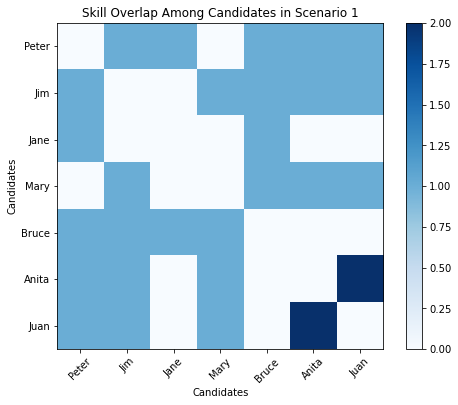

In [31]:
## Visual 3

# Skill Overlap Among Candidates for Scenario 1
skills_overlap_scenario_1 = np.zeros((len(candidates), len(candidates)), dtype=int)
for i, candidate1 in enumerate(candidates.keys()):
    for j, candidate2 in enumerate(candidates.keys()):
        if i != j:
            common_skills = len(set(candidates[candidate1]) & set(candidates[candidate2]))
            skills_overlap_scenario_1[i][j] = common_skills

# Create a heatmap to visualize skill overlap
plt.figure(figsize=(8, 6))
plt.imshow(skills_overlap_scenario_1, cmap='Blues')
plt.colorbar()
plt.xticks(np.arange(len(candidates)), candidates.keys(), rotation=45)
plt.yticks(np.arange(len(candidates)), candidates.keys())
plt.xlabel('Candidates')
plt.ylabel('Candidates')
plt.title('Skill Overlap Among Candidates in Scenario 1')
plt.show()


Valid Solutions for Scenario 2:
Combination 1:
  Database Admin: Jane
  Python Programmer 1: Ciara
  Python Programmer 2: Peter
  Systems Engineer: Mary
  Web Designer: Mary
  AI Engineer 1: Peter
  AI Engineer 2: Juan


Combination 2:
  Database Admin: Jane
  Python Programmer 1: Ciara
  Python Programmer 2: Peter
  Systems Engineer: Mary
  Web Designer: Mary
  AI Engineer 1: Juan
  AI Engineer 2: Peter


Combination 3:
  Database Admin: Jane
  Python Programmer 1: Ciara
  Python Programmer 2: Peter
  Systems Engineer: Mary
  Web Designer: Mary
  AI Engineer 1: Juan
  AI Engineer 2: Jim


Combination 4:
  Database Admin: Jane
  Python Programmer 1: Ciara
  Python Programmer 2: Peter
  Systems Engineer: Mary
  Web Designer: Mary
  AI Engineer 1: Juan
  AI Engineer 2: Anita


Combination 5:
  Database Admin: Jane
  Python Programmer 1: Ciara
  Python Programmer 2: Peter
  Systems Engineer: Mary
  Web Designer: Mary
  AI Engineer 1: Juan
  AI Engineer 2: Juan


Combination 6:
  Database 

  Python Programmer 2: Bruce
  Systems Engineer: Bruce
  Web Designer: Juan
  AI Engineer 1: Jim
  AI Engineer 2: Jim


Combination 243:
  Database Admin: Jane
  Python Programmer 1: Ciara
  Python Programmer 2: Bruce
  Systems Engineer: Bruce
  Web Designer: Juan
  AI Engineer 1: Jim
  AI Engineer 2: Peter


Combination 244:
  Database Admin: Jane
  Python Programmer 1: Ciara
  Python Programmer 2: Bruce
  Systems Engineer: Bruce
  Web Designer: Juan
  AI Engineer 1: Jim
  AI Engineer 2: Anita


Combination 245:
  Database Admin: Jane
  Python Programmer 1: Ciara
  Python Programmer 2: Bruce
  Systems Engineer: Bruce
  Web Designer: Juan
  AI Engineer 1: Anita
  AI Engineer 2: Juan


Combination 246:
  Database Admin: Jane
  Python Programmer 1: Ciara
  Python Programmer 2: Bruce
  Systems Engineer: Bruce
  Web Designer: Juan
  AI Engineer 1: Anita
  AI Engineer 2: Jim


Combination 247:
  Database Admin: Jane
  Python Programmer 1: Ciara
  Python Programmer 2: Bruce
  Systems Enginee

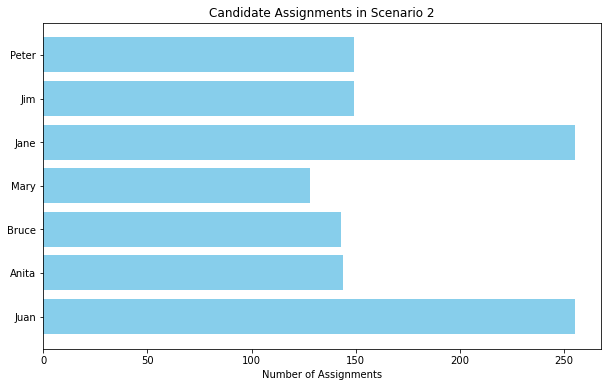

In [25]:
## Scenario 2

from constraint import Problem

def find_hiring_combinations_scenario_2():
    problem = Problem()

    # Candidates and their abilities
    candidates = {
        "Peter": ["Python", "AI"],
        "Jim": ["AI", "Systems"],
        "Jane": ["Python", "Database"],
        "Mary": ["Web", "Systems"],
        "Bruce": ["Systems", "Python"],
        "Anita": ["Web", "AI"],
        "Juan": ["Web", "AI"]  # Including Juan
    }

    # Adding roles to the problem
    problem.addVariable("Python Programmer 1", ["Ciara"])  # Ciara is always one Python Programmer
    problem.addVariable("Python Programmer 2", ["Bruce", "Jane", "Peter"])  # The other Python Programmer
    problem.addVariable("AI Engineer 1", ["Anita", "Jim", "Juan", "Peter"])  # AI Engineers
    problem.addVariable("AI Engineer 2", ["Anita", "Jim", "Juan", "Peter"])  # AI Engineers
    problem.addVariable("Web Designer", ["Anita", "Juan", "Mary"])  # Web Designers
    problem.addVariable("Database Admin", ["Jane"])  # Database Admin
    problem.addVariable("Systems Engineer", ["Bruce", "Jim", "Mary"])  # Systems Engineer

    # Constraint: A person can take on at most two roles and both Ciara and Juan must be included
    def constraint(pp1, pp2, ae1, ae2, wd, da, se):
        roles = [pp1, pp2, ae1, ae2, wd, da, se]
        # Count how many times each candidate is assigned a role
        role_count = {candidate: roles.count(candidate) for candidate in set(roles)}
        # Check if Juan is included and no one has more than 2 roles
        return "Juan" in roles and all(count <= 2 for count in role_count.values())

    problem.addConstraint(constraint, ["Python Programmer 1", "Python Programmer 2", 
                                       "AI Engineer 1", "AI Engineer 2", 
                                       "Web Designer", "Database Admin", "Systems Engineer"])

    # Solve the problem
    return problem.getSolutions()

# Find valid hiring combinations for Scenario 2
hiring_combinations_scenario_2 = find_hiring_combinations_scenario_2()

# Display the solutions
print("Valid Solutions for Scenario 2:")
for i, solution in enumerate(hiring_combinations_scenario_2, start=1):
    print(f"Combination {i}:")
    for role, candidate in solution.items():
        print(f"  {role}: {candidate}")
    print("\n")

    
    



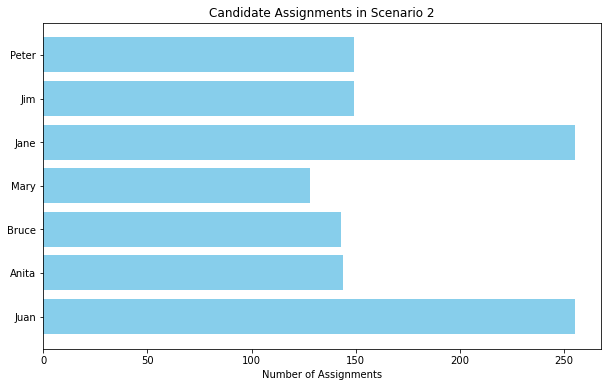

In [27]:
## Visual 1

import matplotlib.pyplot as plt
import numpy as np

# Find valid hiring combinations for Scenario 2
hiring_combinations_scenario_2 = find_hiring_combinations_scenario_2()

# Create a dictionary to store the count of candidates' assignments
candidate_assignments = {
    "Ciara": 0,
    "Jane": 0,
    "Jim": 0,
    "Anita": 0,
    "Juan": 0,
    "Peter": 0,
    "Mary": 0,
    "Bruce": 0
}

# Count the assignments for each candidate in Scenario 2
for solution in hiring_combinations_scenario_2:
    for candidate in candidate_assignments.keys():
        if candidate in solution.values():
            candidate_assignments[candidate] += 1

# Candidates and their abilities
candidates = {
    "Peter": ["Python", "AI"],
    "Jim": ["AI", "Systems"],
    "Jane": ["Python", "Database"],
    "Mary": ["Web", "Systems"],
    "Bruce": ["Systems", "Python"],
    "Anita": ["Web", "AI"],
    "Juan": ["Web", "AI"]
}

# Plot the assignments
candidates_list = list(candidates.keys())
assignments = [candidate_assignments[candidate] for candidate in candidates_list]

plt.figure(figsize=(10, 6))
plt.barh(candidates_list, assignments, color='skyblue')
plt.xlabel('Number of Assignments')
plt.title('Candidate Assignments in Scenario 2')
plt.gca().invert_yaxis()
plt.show()

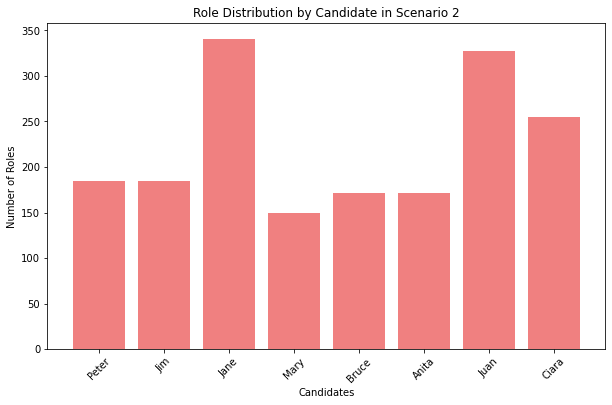

In [34]:
## Visual 2

# Role Distribution by Candidate for Scenario 2
role_counts_scenario_2 = {candidate: 0 for candidate in candidates.keys()}

# Add Ciara to the list of candidates, even though she's always one of the Python Programmers
candidates["Ciara"] = ["Python"]
for solution in hiring_combinations_scenario_2:
    for candidate in solution.values():
        role_counts_scenario_2[candidate] += 1

# Create a bar chart to visualize role distribution
plt.figure(figsize=(10, 6))
plt.bar(role_counts_scenario_2.keys(), role_counts_scenario_2.values(), color='lightcoral')
plt.xlabel('Candidates')
plt.ylabel('Number of Roles')
plt.title('Role Distribution by Candidate in Scenario 2')
plt.xticks(rotation=45)
plt.show()


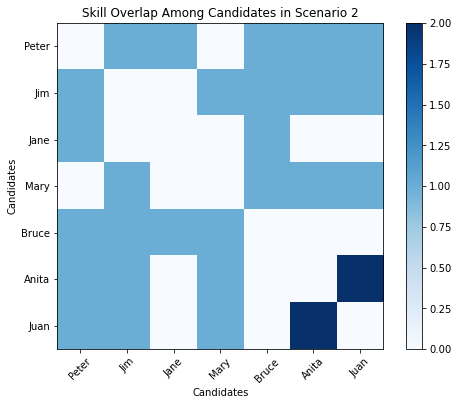

In [32]:
## Visual 3

# Skill Overlap Among Candidates for Scenario 2
skills_overlap_scenario_2 = np.zeros((len(candidates), len(candidates)), dtype=int)
for i, candidate1 in enumerate(candidates.keys()):
    for j, candidate2 in enumerate(candidates.keys()):
        if i != j:
            common_skills = len(set(candidates[candidate1]) & set(candidates[candidate2]))
            skills_overlap_scenario_2[i][j] = common_skills

# Create a heatmap to visualize skill overlap
plt.figure(figsize=(8, 6))
plt.imshow(skills_overlap_scenario_2, cmap='Blues')
plt.colorbar()
plt.xticks(np.arange(len(candidates)), candidates.keys(), rotation=45)
plt.yticks(np.arange(len(candidates)), candidates.keys())
plt.xlabel('Candidates')
plt.ylabel('Candidates')
plt.title('Skill Overlap Among Candidates in Scenario 2')
plt.show()


In [14]:
## Breadth-First Search

from queue import Queue

def is_valid_combination(combination):
    # Check if any candidate is assigned more than two times
    candidate_count = {}
    for candidate in combination:
        candidate_count[candidate] = candidate_count.get(candidate, 0) + 1
        if candidate_count[candidate] > 2:
            return False
    return True

def bfs(candidate_roles, role_names):
    q = Queue()
    q.put([])  # Start with an empty combination

    while not q.empty():
        current_combination = q.get()
        if len(current_combination) == len(candidate_roles) and is_valid_combination(current_combination):
            print_combination(current_combination, role_names)
            continue

        # If the combination is incomplete, add new candidates to it
        if len(current_combination) < len(candidate_roles):
            role_index = len(current_combination)
            for candidate in candidate_roles[role_index]:
                new_combination = current_combination + [candidate]
                q.put(new_combination)

def print_combination(combination, role_names):
    print("Valid Combination:")
    for role, candidate in zip(role_names, combination):
        print(f"  {role}: {candidate}")

# Example roles and candidates for Scenario 1
candidate_roles = [
    ["Ciara"],  # Ciara as Python Programmer 1
    ["Peter", "Jane"],  # Candidates for Python Programmer 2
    ["Peter", "Juan", "Jim", "Anita"],  # Candidates for AI Engineer 1
    ["Peter", "Juan", "Jim", "Anita"],  # Candidates for AI Engineer 2
    ["Juan", "Mary", "Anita"],  # Candidates for Web Designer
    ["Jane"],  # Jane as Database Admin
    ["Jim", "Mary", "Bruce"]  # Candidates for Systems Engineer
]

role_names = ["Python Programmer 1", "Python Programmer 2", "AI Engineer 1", "AI Engineer 2", "Web Designer", "Database Admin", "Systems Engineer"]

bfs(candidate_roles, role_names)


Valid Combination:
  Python Programmer 1: Ciara
  Python Programmer 2: Peter
  AI Engineer 1: Peter
  AI Engineer 2: Juan
  Web Designer: Juan
  Database Admin: Jane
  Systems Engineer: Jim
Valid Combination:
  Python Programmer 1: Ciara
  Python Programmer 2: Peter
  AI Engineer 1: Peter
  AI Engineer 2: Juan
  Web Designer: Juan
  Database Admin: Jane
  Systems Engineer: Mary
Valid Combination:
  Python Programmer 1: Ciara
  Python Programmer 2: Peter
  AI Engineer 1: Peter
  AI Engineer 2: Juan
  Web Designer: Juan
  Database Admin: Jane
  Systems Engineer: Bruce
Valid Combination:
  Python Programmer 1: Ciara
  Python Programmer 2: Peter
  AI Engineer 1: Peter
  AI Engineer 2: Juan
  Web Designer: Mary
  Database Admin: Jane
  Systems Engineer: Jim
Valid Combination:
  Python Programmer 1: Ciara
  Python Programmer 2: Peter
  AI Engineer 1: Peter
  AI Engineer 2: Juan
  Web Designer: Mary
  Database Admin: Jane
  Systems Engineer: Mary
Valid Combination:
  Python Programmer 1: Ciar